# Collaborative Filtering

In [74]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [75]:
#We have .data file. This is not .csv file.
columns = ["userid", "movieid", "rating", "timestamp"]
userMovieData= pd.read_csv('C:/Users/Lenovo/Desktop/IPY/MoviesDataSet/u.data', sep='\t',names= columns)
userMovieData.head(10)

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [76]:
userMovieData.drop( "timestamp", inplace = True, axis = 1 )

In [77]:
userMovieData.shape

(100000, 3)

In [78]:
print(len(userMovieData))
print("Unique UserIds  ---------> ",len( userMovieData['userid'].unique()))
print("Unique MovieIds ---------> ",len( userMovieData['movieid'].unique()))

100000
Unique UserIds  --------->  943
Unique MovieIds --------->  1682


#### Let's assume in this world there exists 943 people and 1682 movies. 943 people have rated different 1682 movies, so generated lot of data -  100000 rows

In [79]:
userMovieData.head(10)

,userid,movieid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


#### To start with creation of "User-User Similarity Martix" it means creating a "Pivot". Pivots can be implemented in multiple ways, ranging from Excel to Programming. We are choosing obviously Python way! NOTE: We are creating pivot using pivot() method. pivot_table() is used to implement pivot tables. 

##### Refer:  https://github.com/rahulvaish/MachineLearningPython/blob/DataWrangling/UnderstandingPivotTables-GBToilets.ipynb

In [80]:
userMovieRatingRelationship = userMovieData.pivot( index='userid', columns='movieid', values = "rating" )

In [81]:
userMovieRatingRelationship

movieid,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userid,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# 943 X 1682 Crosschecked from Cell No.5 !!

In [83]:
# We see a lot of 'NAN's Missing values. Replacing 'NAN's with 0.
# Why 0 makes sense ?
# If user A has not seen the movie B, for B the rating is missing or 0. Same is the situation where movie B has been watched but not rated.

In [84]:
userMovieRatingRelationship.fillna( 0, inplace = True )

In [85]:
userMovieRatingRelationship

movieid,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userid,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#To check a part/section of DataFrame-
#userMovieRatingRelationship.iloc[10:20, 20:30]

# USER-USER SIMILARITY:

#### For calculating similarity between user-user, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc.
#### We will use cosine distance here. Here we are insterested in similarity. That means higher the value more similar they are. 


# *NOTE: The function we are going to use ( pairwise_distances() )gives us the distance, which we have to deduct it from 1. Also the function does not returns DataFrame, we have to perform a conversion over it!

In [87]:
UserUserSimilarity = 1 - pairwise_distances( userMovieRatingRelationship.as_matrix(), metric="cosine" )

In [88]:
UserUserSimilarityDataframe = pd.DataFrame(UserUserSimilarity)

In [89]:
UserUserSimilarityDataframe.shape

(943, 943)

#### Now we have a dataframe "UserUserSimilarityDataframe" which is the matrix form/representation showing the relationship beween all users

In [90]:
UserUserSimilarityDataframe

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941
5,0.430239,0.245843,0.072415,0.068044,0.237286,1.000000,0.489255,0.201369,0.183951,0.551713,...,0.385838,0.111828,0.190075,0.225142,0.137901,0.111852,0.352449,0.144446,0.317328,0.276042
6,0.440367,0.107328,0.066137,0.091230,0.373600,0.489255,1.000000,0.284951,0.145650,0.487024,...,0.456183,0.114179,0.112422,0.117860,0.153353,0.107027,0.329925,0.059993,0.282003,0.394364
7,0.319072,0.103344,0.083060,0.188060,0.248930,0.201369,0.284951,1.000000,0.085942,0.233289,...,0.239171,0.067626,0.094126,0.096483,0.169737,0.095898,0.246883,0.146145,0.175322,0.299809
8,0.078138,0.161048,0.061040,0.101284,0.056847,0.183951,0.145650,0.085942,1.000000,0.198223,...,0.082199,0.048640,0.163049,0.131415,0.118232,0.039852,0.120495,0.143245,0.092497,0.075617
9,0.376544,0.159862,0.065151,0.060859,0.201427,0.551713,0.487024,0.233289,0.198223,1.000000,...,0.351628,0.074066,0.177044,0.149464,0.100861,0.071460,0.342961,0.090305,0.212330,0.221860


# *NOTE: Total Number of Rows and Columns in the Dataframe were 943.  After the transformation, the count of rows and columns is still 943, but the indexing srarted from 0 insted of 1.

#### Now we have a dataframe - represented  as "User-User Similarity Matrix" with numbers everywhere, how to determine the similarity for a particular user, i.e, which user is similar to another user on the basis of his/her movie liking/disliking ?                                                                                                                       

#### To answer this question and understand, we will be using an inbuild method idxmax(). But the problem is that, using "UserUserSimilarityDataframe.idxmax()" results that every person is similar to him/her self (Hopefully you have noticed the '1' in the diagnols). To solve this we need to turn the diagnols = 0 and then calculate.

In [91]:
np.fill_diagonal(UserUserSimilarity, 0 )

#Same Step as done previously
UserUserSimilarityDataframe = pd.DataFrame( UserUserSimilarity )
#Same Step as done previously
UserUserSimilarityDataframe.shape


(943, 943)

In [92]:
#Same Step as done previously
UserUserSimilarityDataframe.columns

RangeIndex(start=0, stop=943, step=1)

In [93]:
UserUserSimilarityDataframe.idxmax(axis=1)

0      915
1      700
2      862
3      749
4      306
5      473
6      649
7      599
8      734
9      473
10     270
11     631
12     233
13     912
14     180
15     822
16     656
17     473
18     578
19     289
20     365
21     637
22     406
23     467
24     912
25     431
26     402
27     366
28     826
29     460
      ... 
913    903
914    283
915     93
916    767
917     84
918    591
919    352
920     41
921     55
922    792
923    693
924    254
925    170
926    108
927    391
928    349
929    767
930    700
931    311
932    652
933     84
934    890
935    485
936    412
937    140
938    717
939    912
940    688
941    453
942    681
Length: 943, dtype: int64

# *NOTE: As the indexing started from 0 instead of 1. Therefore, to compute conclusions from the above results 930   700 =>  We can say that User (930 +1) = 931  is similar to User (700 + 1) = 701




### Pictorial Representation below:
Source:https://github.com/rahulvaish/ReferenceDocuments/blob/master/QuickGuide%5BIMAGES%5D/UserUserSimilarityIndexRepresentation.jpg

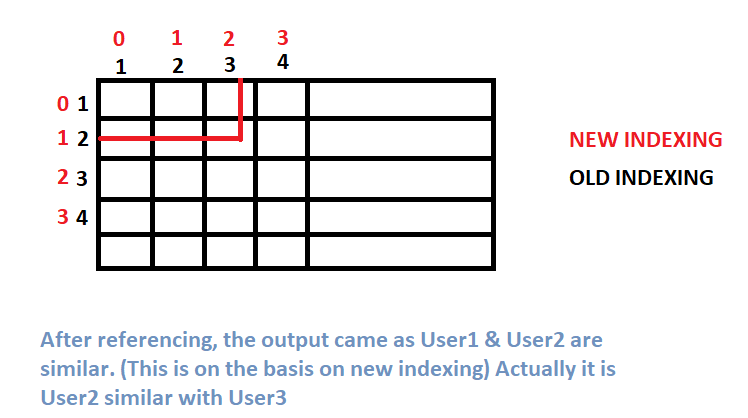

#### Exmaple2: In other words lets say there were 4 people sitting on bench according to their roll numbers 1,2,3,4. Some one came and marked their seats with 0,1,2,3. Those 0,1,2,3 tagging happened for some reference.  Now if Peon enters the class and tells that parents of student 3 has arrived, it will be actual person (with roll number 3) sitting on seat number 3, who will stand up, no reference number consideration shall happen.

# ITEM-ITEM SIMILARITY:

In [94]:
movieUserRatingRelationship = userMovieData.pivot( index='movieid', columns='userid', values = "rating" )

In [95]:
movieUserRatingRelationship

userid,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieid,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,NaN,NaN,NaN,NaN,2.0,5.0,3.0,4.0,4.0,...,NaN,NaN,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,1.0,4.0,5.0,3.0,5.0,3.0,NaN,NaN,3.0


In [38]:
movieUserRatingRelationship.fillna( 0, inplace = True )

In [39]:
ItemItemSimilarity = 1 - pairwise_distances( movieUserRatingRelationship.as_matrix(), metric="correlation" )

In [40]:
ItemItemSimilarityDataframe = pd.DataFrame(ItemItemSimilarity)

In [41]:
ItemItemSimilarityDataframe.shape

(1682, 1682)

In [55]:
ItemItemSimilarityDataframe

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.018215,-0.029676,-0.029676,-0.029676,0.018215,-0.029676,-0.029676,-0.029676,0.034179,0.034179
1,0.234595,1.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,0.071415,0.071415
2,0.193362,0.190649,1.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,-0.009764,-0.009764,-0.009764,-0.009764,0.023964,-0.009764,-0.009764,-0.009764,-0.009764,0.091421
3,0.226213,0.409044,0.227849,1.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,-0.016619,-0.016619,0.088984,0.088984,0.025622,-0.016619,-0.016619,-0.016619,0.046743,0.067863
4,0.128840,0.240712,0.141368,0.237298,1.000000,-0.008594,0.205289,0.145866,0.142541,-0.033746,...,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,0.088618
5,0.015113,0.030062,0.065347,0.021878,-0.008594,1.000000,0.054415,0.012330,0.079619,0.166084,...,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159
6,0.347354,0.220022,0.258855,0.295489,0.205289,0.054415,1.000000,0.190670,0.286572,0.178505,...,-0.026036,0.039920,-0.026036,-0.026036,0.039920,-0.026036,-0.026036,-0.026036,0.039920,0.039920
7,0.254490,0.206020,0.078636,0.352800,0.145866,0.012330,0.190670,1.000000,0.229331,0.152679,...,-0.017230,0.075617,0.057047,0.057047,0.075617,-0.017230,-0.017230,-0.017230,0.075617,-0.017230
8,0.209502,0.077894,0.146181,0.229922,0.142541,0.079619,0.286572,0.229331,1.000000,0.158373,...,-0.021125,-0.021125,0.047273,0.047273,0.064372,-0.021125,-0.021125,-0.021125,0.047273,0.064372
9,0.104655,0.072906,0.079608,0.138220,-0.033746,0.166084,0.178505,0.152679,0.158373,1.000000,...,-0.010138,-0.010138,0.073967,0.073967,-0.010138,-0.010138,-0.010138,-0.010138,-0.010138,-0.010138


# *NOTE: The indexing before and after using pairwise_distances(). Before the indexing was starting from 1, and now, its starting from 0.

In [106]:
# ItemItemSimilarityDataframe.idxmax(axis=1)

# np.fill_diagonal(ItemItemSimilarity, 0 )

# #Same Step as done previously
# ItemItemSimilarityDataframe = pd.DataFrame( ItemItemSimilarity )
# #Same Step as done previously
# ItemItemSimilarityDataframe.shape

# ItemItemSimilarityDataframe.idxmax(axis=1)

# In USER-USER Similarity 
# X axis = USER | Y axis = ITEM ------> X axis = USER| Y axis = USER.


# In ITEM-ITEM Similarity 
# X axis = ITEM | Y axis = USER ------> X axis = ITEM| Y axis = ITEM.


#### Now, for ITEM-ITEM Similarity relationship, if we are also interested in decoding the item names, then we will have to use "u.item" data set. It contains ItemId (movie Id) and its corresponding Item Names (movie Name).

In [99]:
itemData= pd.read_csv('C:/Users/Lenovo/Desktop/IPY/MoviesDataSet/u.item', sep='\|', header = None )
itemData = itemData.iloc[:,:2]
itemData.columns = ['movieid', 'title']
itemData.head(10)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movieid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [100]:
#Introducing a new column 'similarity' in the original dataframe.
itemData['similarity'] = ItemItemSimilarityDataframe.iloc[0]

### Pictorial Representation below:
Source:https://github.com/rahulvaish/ReferenceDocuments/blob/master/QuickGuide%5BIMAGES%5D/ItemItemSimilarityIndexRepresentation.png

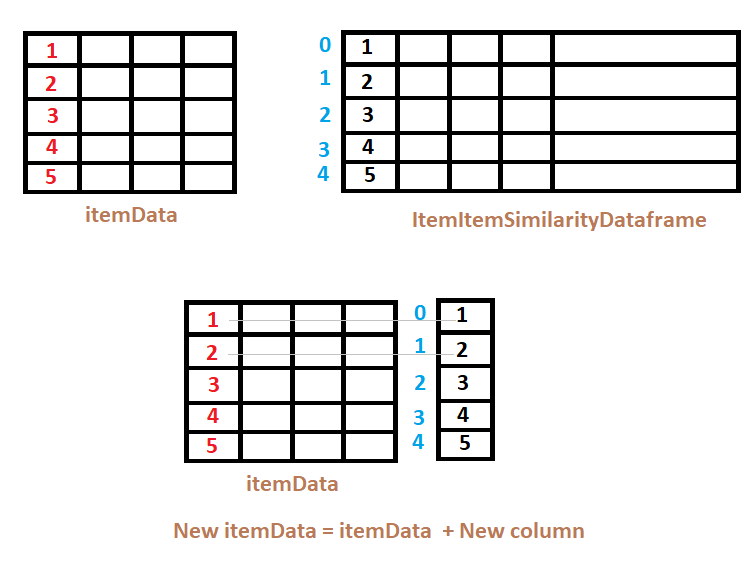

In [101]:
itemData.head(10)

,movieid,title,similarity
0,1,Toy Story (1995),0.000000
1,2,GoldenEye (1995),0.234595
2,3,Four Rooms (1995),0.193362
3,4,Get Shorty (1995),0.226213
4,5,Copycat (1995),0.128840
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0.015113
6,7,Twelve Monkeys (1995),0.347354
7,8,Babe (1995),0.254490
8,9,Dead Man Walking (1995),0.209502
9,10,Richard III (1995),0.104655


In [102]:
userMovieData.sort_values( ["similarity"], ascending = False )[1:10]

KeyError: 'similarity'

In [103]:

def get_similar_movies( movieid, topN = 5 ):
  userMovieData['similarity'] = ItemItemSimilarityDataframe.iloc[movieid -1]
  top_n = userMovieData.sort_values( ["similarity"], ascending = False )[0:topN]
  print( "Similar Movies to: ", )
  return top_n

In [105]:
get_similar_movies( 5 )

Similar Movies to: 


,userid,movieid,rating,similarity
217,161,202,5,0.491034
218,148,408,5,0.419405
53,25,181,5,0.418255
671,188,692,5,0.393630
52,260,322,4,0.385697
